In [3]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np

In [19]:
df = pd.read_csv('all_data.csv')

In [20]:
print(df.head())

  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10


In [21]:
grouped_data = df.groupby('Country').agg({'GDP': np.sum, 'Life expectancy at birth (years)':np.mean})
grouped_data

,GDP,Life expectancy at birth (years)
Country,,
Chile,2.716622e+12,78.94375
China,7.932342e+13,74.26250
Germany,4.951641e+13,79.65625
Mexico,1.562641e+13,75.71875
United States of America,2.252000e+14,78.06250
Zimbabwe,1.450013e+11,50.09375


In [22]:
unique_countries = df['Country'].unique()
unique_years = df['Year'].unique()

In [23]:
print(df.isna().any())

Country                             False
Year                                False
Life expectancy at birth (years)    False
GDP                                 False
dtype: bool


In [24]:
max_mean = 0
max_med = 0
for i in unique_countries:
    mean_gdp = np.mean(df['GDP'][df['Country'] == i])
    if mean_gdp > max_mean:
        max_mean = mean_gdp 
        index_mean = i
    median_gdp = np.median(df['GDP'][df['Country'] == i])
    if median_gdp > max_med:
        max_med = median_gdp 
        index_med = i
    print('Average GDP of {country} for all period (2000-2015) is {mean} U.S. dollars.'.format(country = i, mean = mean_gdp))
    print('Median GDP of {country} for all period (2000-2015) is {median} U.S. dollars.\n'.format(country = i, median = median_gdp))
print('The median GDP of {} is higher then median GDP of all other countries'.format(index_med))
print('The average GDP of {} is higher then average GDP of all other countries.'.format(index_mean))


Average GDP of Chile for all period (2000-2015) is 169788845015.3125 U.S. dollars.
Median GDP of Chile for all period (2000-2015) is 172997500000.0 U.S. dollars.

Average GDP of China for all period (2000-2015) is 4957713750000.0 U.S. dollars.
Median GDP of China for all period (2000-2015) is 4075195000000.0 U.S. dollars.

Average GDP of Germany for all period (2000-2015) is 3094775625000.0 U.S. dollars.
Median GDP of Germany for all period (2000-2015) is 3396350000000.0 U.S. dollars.

Average GDP of Mexico for all period (2000-2015) is 976650625000.0 U.S. dollars.
Median GDP of Mexico for all period (2000-2015) is 1004375500000.0 U.S. dollars.

Average GDP of United States of America for all period (2000-2015) is 14075000000000.0 U.S. dollars.
Median GDP of United States of America for all period (2000-2015) is 14450000000000.0 U.S. dollars.

Average GDP of Zimbabwe for all period (2000-2015) is 9062579595.0625 U.S. dollars.
Median GDP of Zimbabwe for all period (2000-2015) is 6733671

In [25]:
max_mean_age = 0
max_med_age = 0
for i in unique_countries:
    mean_age = np.mean(df['Life expectancy at birth (years)'][df['Country'] == i])
    if mean_age > max_mean_age:
        max_mean_age = mean_age 
        in_mean = i
    median_age = np.median(df['Life expectancy at birth (years)'][df['Country'] == i])
    if median_age > max_med_age:
        max_med_age = median_age 
        in_med = i
    print('Average life expectancy at birth (years) of {country} for all period (2000-2015) is {mean} y.o.'.format(country = i, mean = round(mean_age, 2)))
    print('Median life expectancy at birth (years) of {country} for all period (2000-2015) is {median} y.o.\n'.format(country = i, median = round(median_age, 2)))
print('The median life expectancy at birth (years) of {} is higher then median life expectancy at birth (years) of all other countries'.format(in_med))
print('The average life expectancy at birth (years) of {} is higher then average life expectancy at birth (years) of all other countries.'.format(in_mean))

Average life expectancy at birth (years) of Chile for all period (2000-2015) is 78.94 y.o.
Median life expectancy at birth (years) of Chile for all period (2000-2015) is 79.0 y.o.

Average life expectancy at birth (years) of China for all period (2000-2015) is 74.26 y.o.
Median life expectancy at birth (years) of China for all period (2000-2015) is 74.45 y.o.

Average life expectancy at birth (years) of Germany for all period (2000-2015) is 79.66 y.o.
Median life expectancy at birth (years) of Germany for all period (2000-2015) is 79.85 y.o.

Average life expectancy at birth (years) of Mexico for all period (2000-2015) is 75.72 y.o.
Median life expectancy at birth (years) of Mexico for all period (2000-2015) is 75.65 y.o.

Average life expectancy at birth (years) of United States of America for all period (2000-2015) is 78.06 y.o.
Median life expectancy at birth (years) of United States of America for all period (2000-2015) is 78.15 y.o.

Average life expectancy at birth (years) of Zim

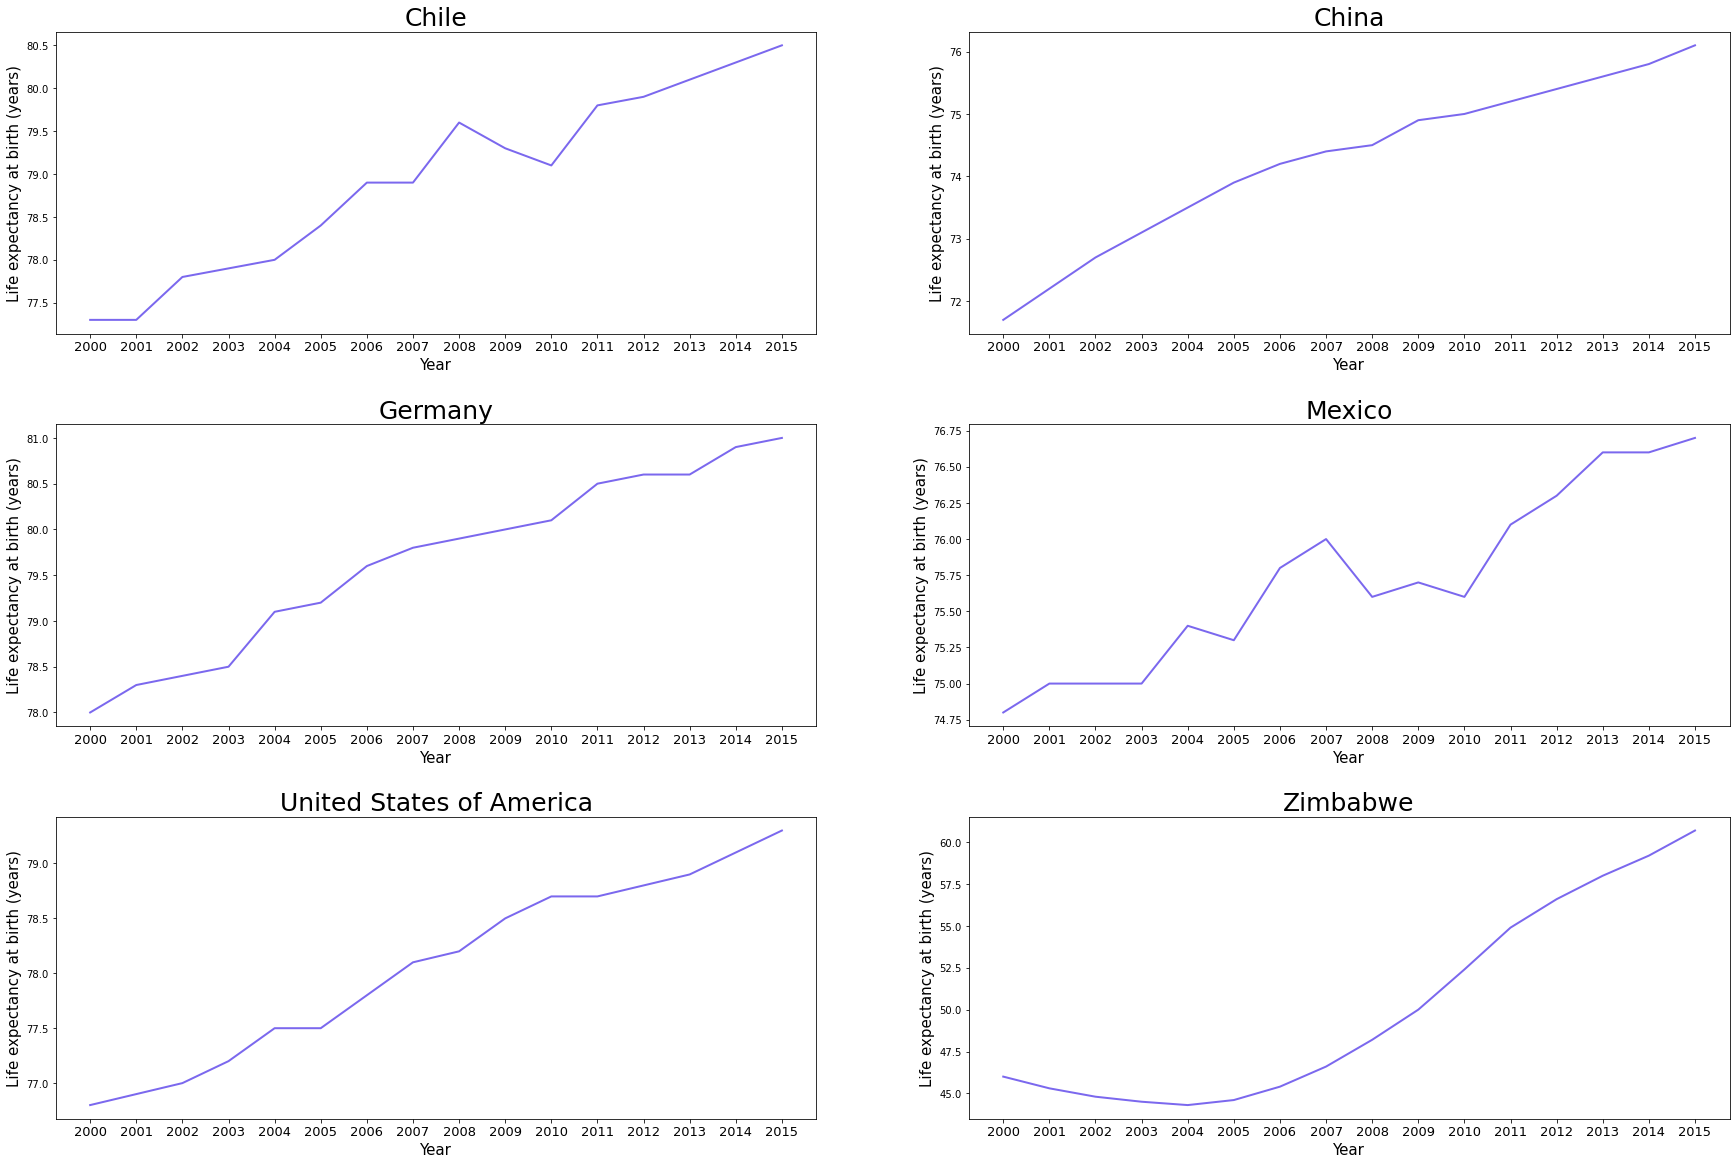

In [26]:
fig, ax = plt.subplots(3, 2, figsize = (30, 20))
fig.subplots_adjust(wspace = .2, hspace = .3)
ax = ax.ravel()
for i in unique_countries:
    index = unique_countries.tolist().index(i)
    ax[index].plot(unique_years, df['Life expectancy at birth (years)'][df['Country'] == i], linewidth = 2, color = 'mediumslateblue')
    ax[index].set_title(i, fontsize = 25)
    ax[index].set_xlabel('Year', fontsize = 15)
    ax[index].set_xticks(unique_years)
    ax[index].set_xticklabels(unique_years, fontsize = 13)
    ax[index].set_ylabel('Life expectancy at birth (years)', fontsize = 15)


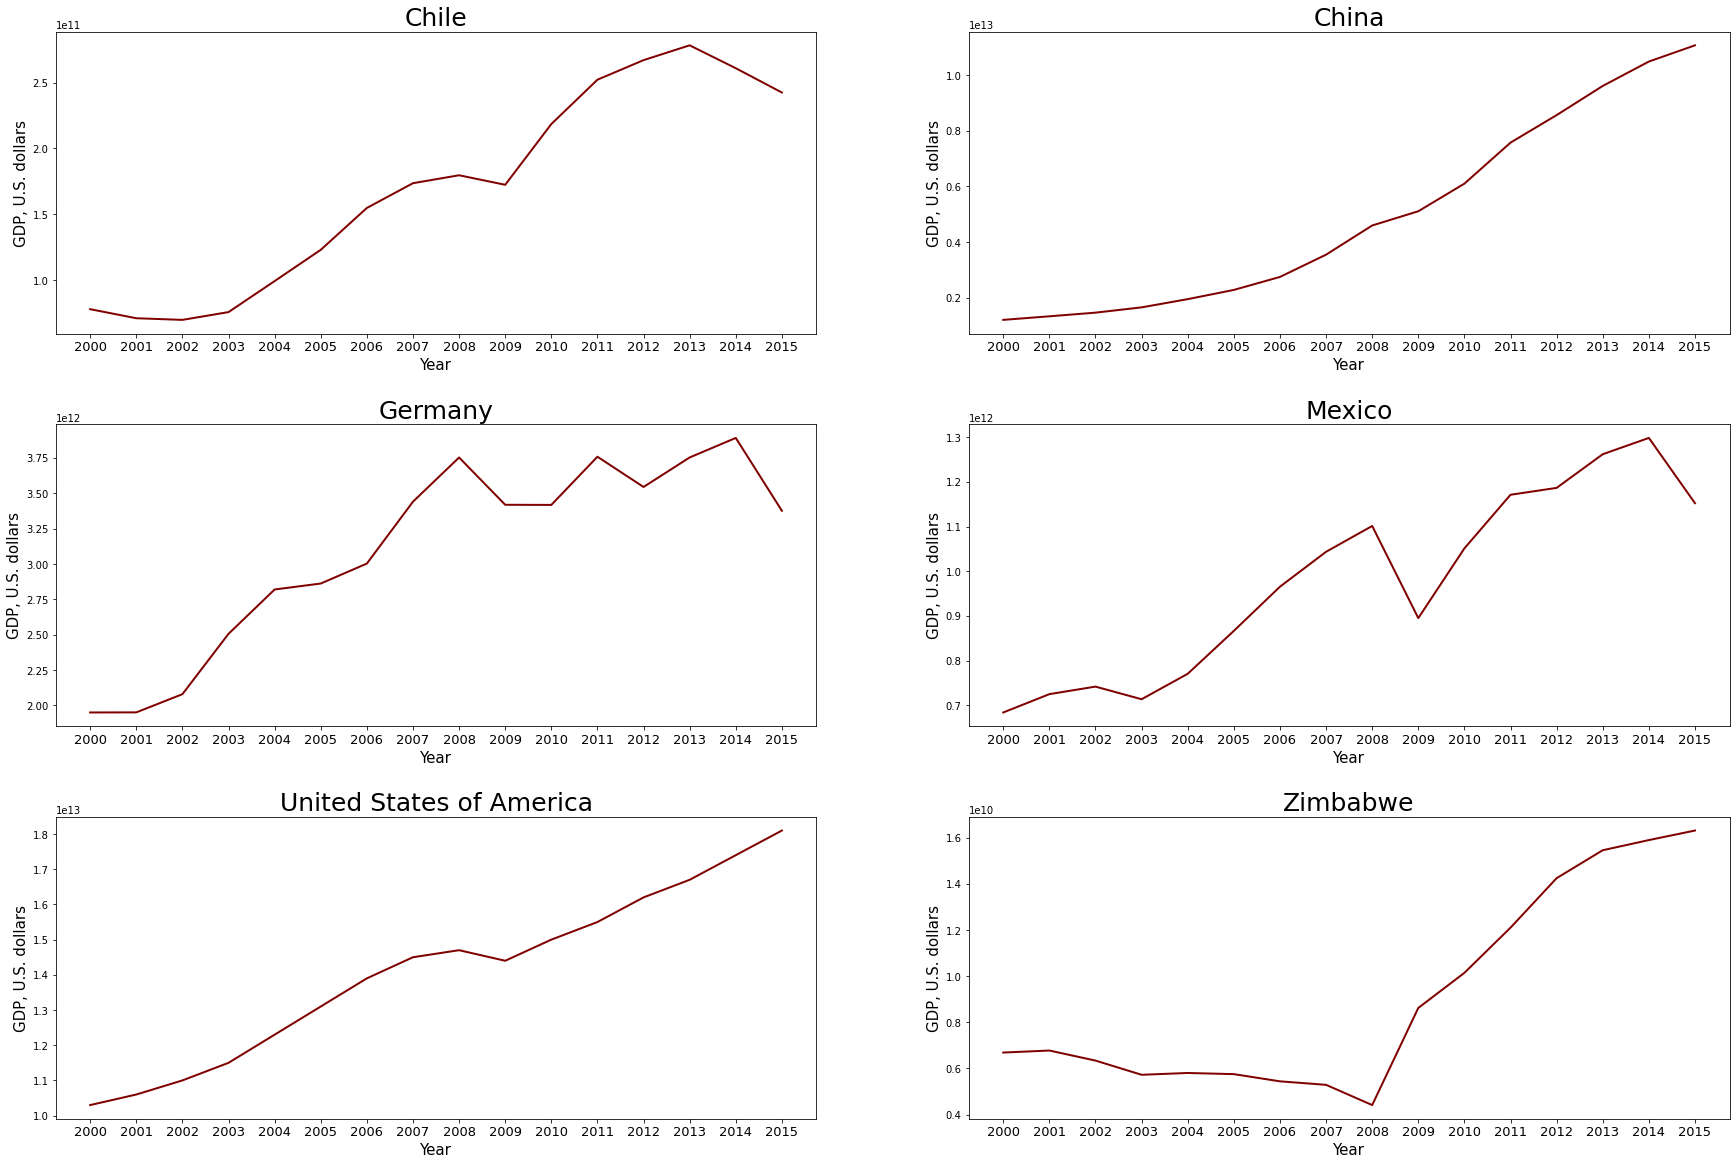

In [27]:
fig, ax = plt.subplots(3, 2, figsize = (30, 20))
fig.subplots_adjust(wspace = .2, hspace = .3)
ax = ax.ravel()
for i in unique_countries:
    index = unique_countries.tolist().index(i)
    ax[index].plot(unique_years, df['GDP'][df['Country'] == i], linewidth = 2, color = 'maroon')
    ax[index].set_title(i, fontsize = 25)
    ax[index].set_xlabel('Year', fontsize = 15)
    ax[index].set_xticks(unique_years)
    ax[index].set_xticklabels(unique_years, fontsize = 13)
    ax[index].set_ylabel('GDP, U.S. dollars', fontsize = 15)

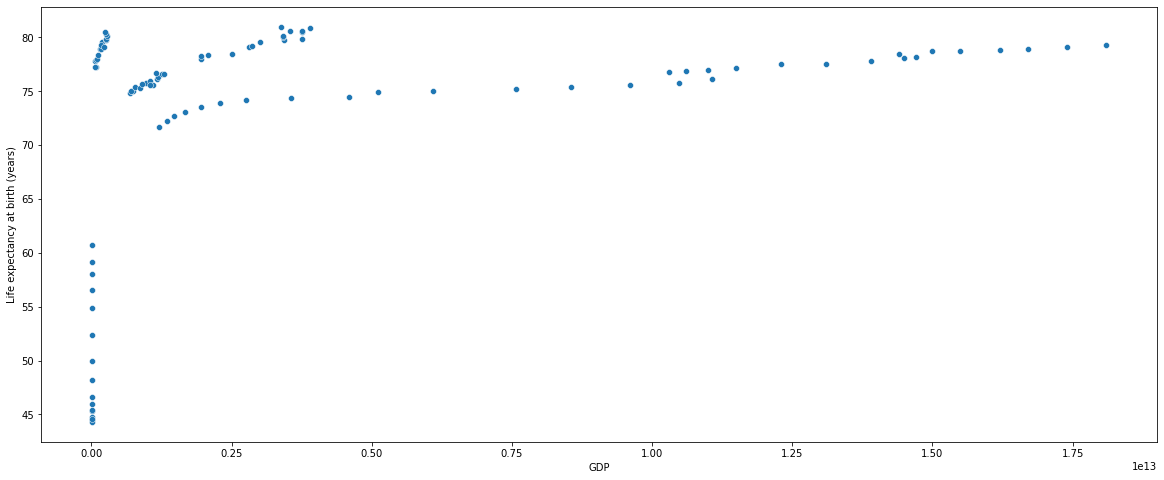

In [53]:
fig, ax = plt.subplots(figsize = (20, 8))

sns.scatterplot(data = df, y = 'Life expectancy at birth (years)', x = 'GDP')
plt.show()

In [51]:
corr_mat = df['GDP'].corr(df['Life expectancy at birth (years)'])
res = 'Negative' if corr_mat < 0 else ('Weak' if corr_mat <0.5 else ('Medium'if 0.5<=corr_mat<=0.7 else 'Strong'))
print('Correlation coefficient beetwen "Life expectancy at birth" and \'GDP\' is {value}.\n{res} correlation'.format(value = corr_mat, res = res))



Correlation coefficient beetwen "Life expectancy at birth" and 'GDP' is 0.3432067484491559.
Weak correlation
